In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

### 1. Data

In [11]:
df = pd.read_csv("data/data_regression_median.csv", index_col=0)
#df = df[df.language == "English"]
df = pd.get_dummies(df, columns=['content_rating'])
df = df.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG'])
features_imdb = ["duration", "budget", *[f"{i}_rank" for i in ("director", "actor1", "actor2", "actor3")],
                 "movie_facebook_likes", "cast_total_facebook_likes", "Biography", "Comedy", "Crime", "Drama", 
                 "Romance", "Mystery_Thriller_Horror", "Sci-Fi_Fantasy", "Family_Animation", "Action_Adventure",
                 "History_War", "Others", "facenumber_in_poster", "imdb_score",
                 'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'
                ]
df_imdb = df[features_imdb]

In [12]:
df_imdb.columns

Index(['duration', 'budget', 'director_rank', 'actor1_rank', 'actor2_rank',
       'actor3_rank', 'movie_facebook_likes', 'cast_total_facebook_likes',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'facenumber_in_poster',
       'imdb_score', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')

In [13]:
features_prof = ["duration", "budget",
                 *[f"{i}_facebook_likes" for i in ("director", "actor_1", "actor_2", "actor_3")],
                 *[f"{i}_rank" for i in ("director", "actor1", "actor2", "actor3")],
                 "movie_facebook_likes", "cast_total_facebook_likes", "Biography", "Comedy", "Crime", "Drama", 
                 "Romance", "Mystery_Thriller_Horror", "Sci-Fi_Fantasy", "Family_Animation", "Action_Adventure",
                 "History_War", "Others", "facenumber_in_poster", "gross_budget_ratio",
                 'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'
                ]
df_prof = df[features_prof]


In [14]:
df_imdb.columns

Index(['duration', 'budget', 'director_rank', 'actor1_rank', 'actor2_rank',
       'actor3_rank', 'movie_facebook_likes', 'cast_total_facebook_likes',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'facenumber_in_poster',
       'imdb_score', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')

In [15]:
df_imdb.shape, df_prof.shape

((3966, 24), (3966, 28))

In [16]:
def norm(x, x_stats):
    return (x - x_stats["mean"])/x_stats["std"]

### 2. Predict IMDB Scores

In [ ]:
X = df_imdb.loc[:, ~df_imdb.columns.isin(["imdb_score"])]
X_stats = X.describe().transpose()

normed_X = norm(X, X_stats)
y1 = df_imdb.imdb_score

In [ ]:
normed_X

In [172]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

In [173]:
X_train.shape, X_test.shape

((2657, 23), (1309, 23))

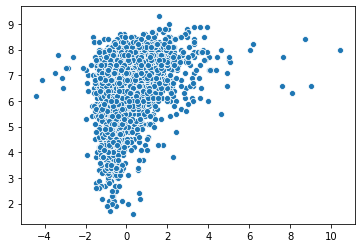

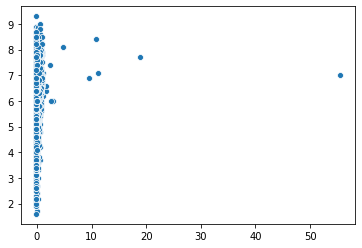

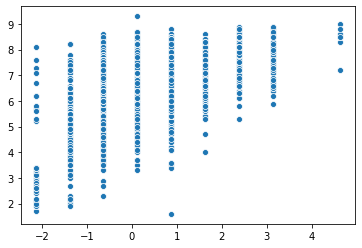

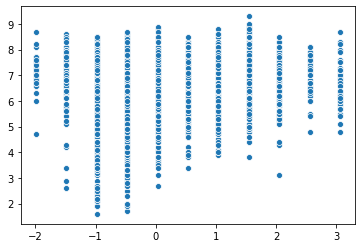

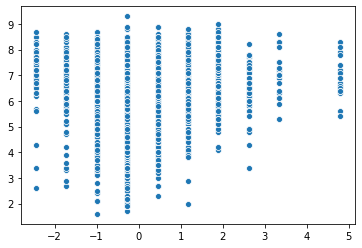

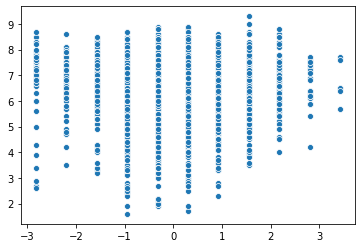

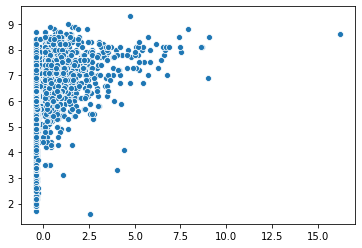

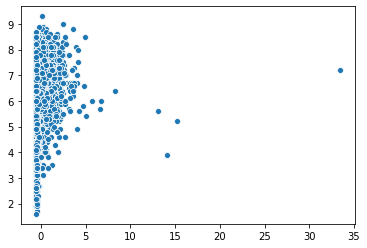

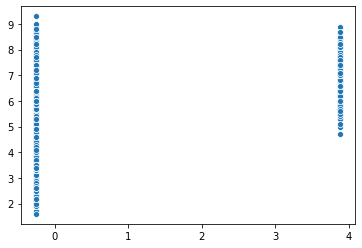

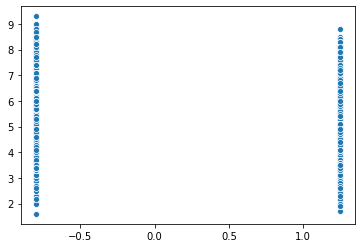

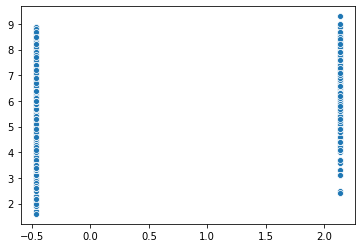

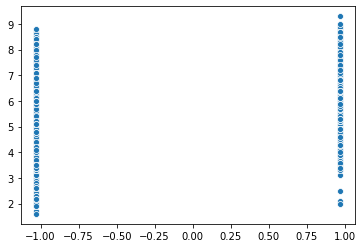

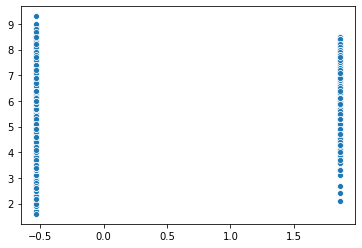

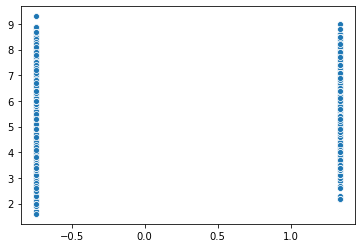

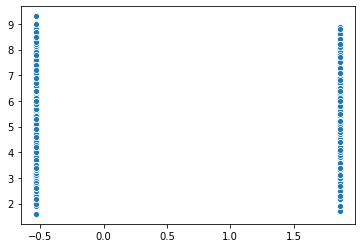

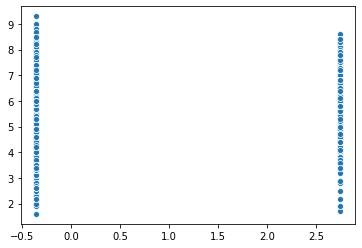

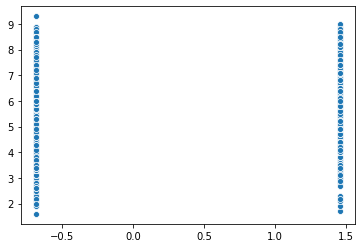

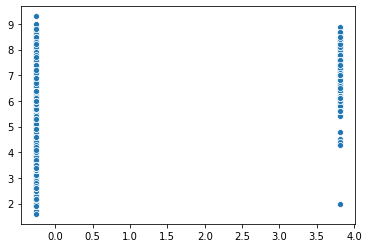

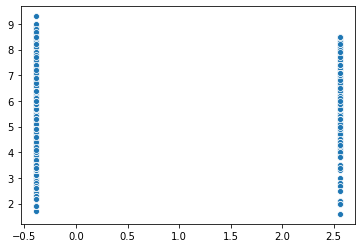

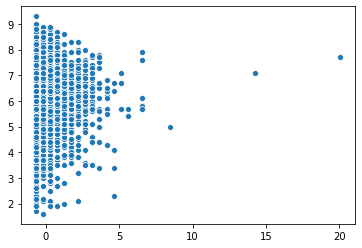

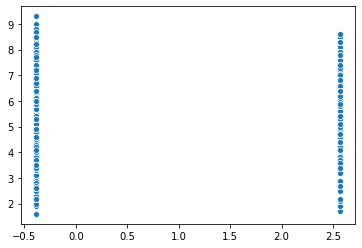

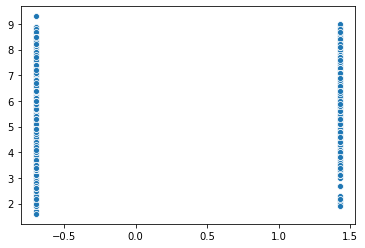

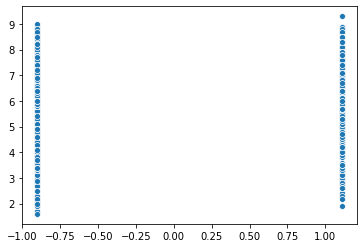

In [174]:
for x in normed_X.columns:
    sns.scatterplot(list(normed_X[x]), np.array(y1).reshape(y1.shape[0],))
    plt.show()

In [121]:
normed_X

,Action_Adventure,Biography,Comedy,Crime,Drama,Family_Animation,History_War,Mystery_Thriller_Horror,Others,Romance,...,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,director_facebook_likes,director_rank,duration,facenumber_in_poster,movie_facebook_likes
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0035423,-0.685103,-0.257681,1.231208,-0.47204,-1.001754,-0.365406,-0.243712,-0.758591,-0.393764,1.870901,...,1.391451,-0.906853,NaN,NaN,NaN,NaN,NaN,0.749236,-0.202589,-0.417678
tt0080487,-0.685103,-0.257681,1.231208,-0.47204,-1.001754,-0.365406,-0.243712,-0.758591,2.538908,-0.534358,...,-0.718480,1.102417,NaN,NaN,NaN,NaN,NaN,-0.470743,0.752787,-0.417678
tt0080549,-0.685103,3.879719,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,2.538908,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.798035,-0.680278,-0.417678
tt0080661,-0.685103,-0.257681,-0.811991,-0.47204,-1.001754,-0.365406,-0.243712,1.317877,-0.393764,1.870901,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,-0.177948,-0.680278,-0.417678
tt0080678,-0.685103,3.879719,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.798035,-0.202589,0.001327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt4733536,1.459241,-0.257681,1.231208,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,-1.056332,0.275099,-0.392118
tt4786282,-0.685103,-0.257681,-0.811991,-0.47204,-1.001754,-0.365406,-0.243712,1.317877,-0.393764,-0.534358,...,1.391451,-0.906853,NaN,NaN,NaN,NaN,NaN,-1.300328,-0.680278,-0.417678
tt4824308,-0.685103,-0.257681,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.602839,4.574295,-0.417678


In [175]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
#     tfkl.Dense(64, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])
model.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=700, workers=10, use_multiprocessing=True)

Train on 2125 samples, validate on 532 samples
Epoch 1/700
2125/2125 [==============================] - 0s 201us/sample - loss: 42.4040 - mse: 42.4040 - mae: 6.2786 - val_loss: 41.1109 - val_mse: 41.1109 - val_mae: 6.2317
Epoch 2/700
2125/2125 [==============================] - 0s 24us/sample - loss: 38.6214 - mse: 38.6213 - mae: 6.0601 - val_loss: 37.9484 - val_mse: 37.9484 - val_mae: 6.0222
Epoch 3/700
2125/2125 [==============================] - 0s 25us/sample - loss: 35.4005 - mse: 35.4005 - mae: 5.8263 - val_loss: 34.8482 - val_mse: 34.8482 - val_mae: 5.7830
Epoch 4/700
2125/2125 [==============================] - 0s 25us/sample - loss: 32.1959 - mse: 32.1959 - mae: 5.5572 - val_loss: 31.5697 - val_mse: 31.5697 - val_mae: 5.4997
Epoch 5/700
2125/2125 [==============================] - 0s 22us/sample - loss: 28.7396 - mse: 28.7396 - mae: 5.2470 - val_loss: 27.8479 - val_mse: 27.8479 - val_mae: 5.1612
Epoch 6/700
2125/2125 [==============================] - 0s 23us/sample - loss: 25

Epoch 96/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.5767 - mse: 0.5767 - mae: 0.5780 - val_loss: 0.6259 - val_mse: 0.6259 - val_mae: 0.6146
Epoch 97/700
2125/2125 [==============================] - 0s 35us/sample - loss: 0.5715 - mse: 0.5715 - mae: 0.5731 - val_loss: 0.6204 - val_mse: 0.6204 - val_mae: 0.6154
Epoch 98/700
2125/2125 [==============================] - 0s 48us/sample - loss: 0.5721 - mse: 0.5721 - mae: 0.5753 - val_loss: 0.6220 - val_mse: 0.6220 - val_mae: 0.6152
Epoch 99/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.5706 - mse: 0.5706 - mae: 0.5717 - val_loss: 0.6208 - val_mse: 0.6208 - val_mae: 0.6131
Epoch 100/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.5641 - mse: 0.5641 - mae: 0.5699 - val_loss: 0.6208 - val_mse: 0.6208 - val_mae: 0.6161
Epoch 101/700
2125/2125 [==============================] - 0s 27us/sample - loss: 0.5669 - mse: 0.5669 - mae: 0.5701 - val_loss: 0.6165 - val_ms

Epoch 144/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.5031 - mse: 0.5031 - mae: 0.5348 - val_loss: 0.5935 - val_mse: 0.5935 - val_mae: 0.6002
Epoch 145/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.5012 - mse: 0.5012 - mae: 0.5350 - val_loss: 0.5934 - val_mse: 0.5934 - val_mae: 0.6002
Epoch 146/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.4985 - mse: 0.4985 - mae: 0.5335 - val_loss: 0.5968 - val_mse: 0.5968 - val_mae: 0.6037
Epoch 147/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4982 - mse: 0.4982 - mae: 0.5346 - val_loss: 0.5948 - val_mse: 0.5948 - val_mae: 0.6026
Epoch 148/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4959 - mse: 0.4959 - mae: 0.5345 - val_loss: 0.5986 - val_mse: 0.5986 - val_mae: 0.6012
Epoch 149/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4981 - mse: 0.4981 - mae: 0.5325 - val_loss: 0.5894 - va

Epoch 239/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4434 - mse: 0.4434 - mae: 0.5032 - val_loss: 0.5981 - val_mse: 0.5981 - val_mae: 0.6044
Epoch 240/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4439 - mse: 0.4439 - mae: 0.5046 - val_loss: 0.5960 - val_mse: 0.5960 - val_mae: 0.6039
Epoch 241/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4441 - mse: 0.4441 - mae: 0.5032 - val_loss: 0.6051 - val_mse: 0.6051 - val_mae: 0.6104
Epoch 242/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.4437 - mse: 0.4437 - mae: 0.5012 - val_loss: 0.5915 - val_mse: 0.5915 - val_mae: 0.6017
Epoch 243/700
2125/2125 [==============================] - 0s 31us/sample - loss: 0.4388 - mse: 0.4388 - mae: 0.5015 - val_loss: 0.5972 - val_mse: 0.5972 - val_mae: 0.6026
Epoch 244/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4417 - mse: 0.4417 - mae: 0.5029 - val_loss: 0.5982 - va

Epoch 334/700
2125/2125 [==============================] - 0s 25us/sample - loss: 0.4186 - mse: 0.4186 - mae: 0.4915 - val_loss: 0.5983 - val_mse: 0.5983 - val_mae: 0.6013
Epoch 335/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4174 - mse: 0.4174 - mae: 0.4886 - val_loss: 0.5986 - val_mse: 0.5986 - val_mae: 0.6056
Epoch 336/700
2125/2125 [==============================] - 0s 30us/sample - loss: 0.4160 - mse: 0.4160 - mae: 0.4877 - val_loss: 0.6022 - val_mse: 0.6022 - val_mae: 0.6094
Epoch 337/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4132 - mse: 0.4132 - mae: 0.4872 - val_loss: 0.6075 - val_mse: 0.6075 - val_mae: 0.6121
Epoch 338/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.4115 - mse: 0.4115 - mae: 0.4852 - val_loss: 0.6014 - val_mse: 0.6014 - val_mae: 0.6084
Epoch 339/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.4228 - mse: 0.4228 - mae: 0.4933 - val_loss: 0.6015 - va

Epoch 429/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3955 - mse: 0.3955 - mae: 0.4779 - val_loss: 0.6042 - val_mse: 0.6042 - val_mae: 0.6057
Epoch 430/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3920 - mse: 0.3920 - mae: 0.4758 - val_loss: 0.6014 - val_mse: 0.6014 - val_mae: 0.6029
Epoch 431/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3961 - mse: 0.3961 - mae: 0.4770 - val_loss: 0.6150 - val_mse: 0.6150 - val_mae: 0.6120
Epoch 432/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.3948 - mse: 0.3948 - mae: 0.4774 - val_loss: 0.6116 - val_mse: 0.6116 - val_mae: 0.6115
Epoch 433/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.3928 - mse: 0.3928 - mae: 0.4745 - val_loss: 0.6070 - val_mse: 0.6070 - val_mae: 0.6047
Epoch 434/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.3960 - mse: 0.3960 - mae: 0.4786 - val_loss: 0.6207 - va

Epoch 524/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.3821 - mse: 0.3821 - mae: 0.4677 - val_loss: 0.6102 - val_mse: 0.6102 - val_mae: 0.6056
Epoch 525/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3764 - mse: 0.3764 - mae: 0.4638 - val_loss: 0.6227 - val_mse: 0.6227 - val_mae: 0.6123
Epoch 526/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3808 - mse: 0.3808 - mae: 0.4685 - val_loss: 0.6115 - val_mse: 0.6115 - val_mae: 0.6104
Epoch 527/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3801 - mse: 0.3801 - mae: 0.4659 - val_loss: 0.6210 - val_mse: 0.6210 - val_mae: 0.6151
Epoch 528/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3808 - mse: 0.3808 - mae: 0.4675 - val_loss: 0.6114 - val_mse: 0.6114 - val_mae: 0.6058
Epoch 529/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3794 - mse: 0.3794 - mae: 0.4676 - val_loss: 0.6096 - va

Epoch 619/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.3710 - mse: 0.3710 - mae: 0.4618 - val_loss: 0.6146 - val_mse: 0.6146 - val_mae: 0.6080
Epoch 620/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3676 - mse: 0.3676 - mae: 0.4580 - val_loss: 0.6243 - val_mse: 0.6243 - val_mae: 0.6137
Epoch 621/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3708 - mse: 0.3708 - mae: 0.4624 - val_loss: 0.6143 - val_mse: 0.6143 - val_mae: 0.6027
Epoch 622/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3674 - mse: 0.3674 - mae: 0.4609 - val_loss: 0.6269 - val_mse: 0.6269 - val_mae: 0.6127
Epoch 623/700
2125/2125 [==============================] - 0s 27us/sample - loss: 0.3652 - mse: 0.3652 - mae: 0.4594 - val_loss: 0.6278 - val_mse: 0.6278 - val_mae: 0.6143
Epoch 624/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3717 - mse: 0.3717 - mae: 0.4622 - val_loss: 0.6217 - va

In [176]:
preds = model.predict(np.array(X_test)).flatten()

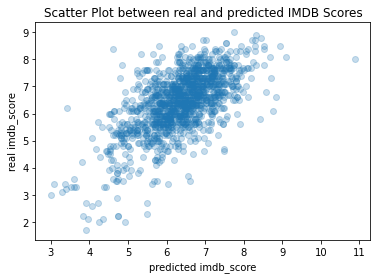

In [179]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25)
plt.ylabel("real imdb_score")
plt.xlabel("predicted imdb_score")
plt.title("Scatter Plot between real and predicted IMDB Scores", size=12)
plt.show()

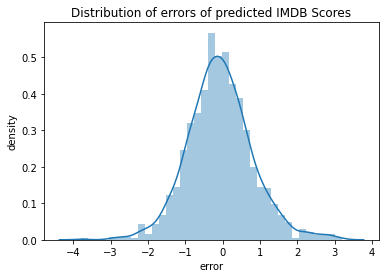

In [180]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!
plt.title("Distribution of errors of predicted IMDB Scores", size=12)
plt.xlabel("error")
plt.ylabel("density")
plt.show()

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(
    mean_squared_error(np.array(y_test), preds),
    mean_absolute_error(np.array(y_test), preds),
    explained_variance_score(np.array(y_test), preds),
    r2_score(np.array(y_test), preds)
)

0.7671210977915994 0.6703616141908673 0.38756391743018215 0.38406185707447693


### 3. Predict Profitability

#### 3.1. Traditional neural network predicting log profitability

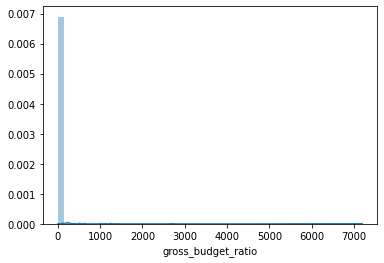

In [17]:
sns.distplot(df_prof["gross_budget_ratio"])

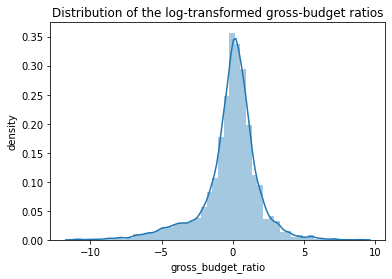

In [35]:
sns.distplot(np.log(df_prof["gross_budget_ratio"]))
plt.title("Distribution of the log-transformed gross-budget ratios", size=12)
plt.ylabel("density")
plt.show()

In [20]:
df_cut = df_prof[df_prof.gross_budget_ratio < 5]
X_cut = df_cut.loc[:, ~df_cut.columns.isin(["gross_budget_ratio"])]
X_cut.shape

(3496, 27)

In [21]:
# not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
#               "num_user_for_reviews"]
X_cut_stats = X_cut.describe().transpose() 
normed_X_cut = norm(X_cut, X_cut_stats).reset_index(drop=True)
y2 = np.log(df_prof[df_prof["gross_budget_ratio"] < 5].gross_budget_ratio)

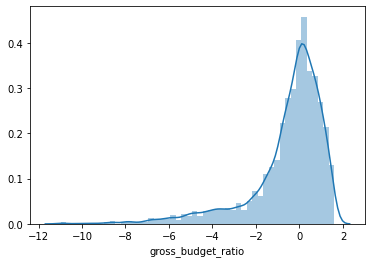

In [22]:
sns.distplot(y2)

In [261]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y2, test_size=0.33, random_state=42)

In [262]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
#     tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
#     tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=128, 
          epochs=1000, workers=10, use_multiprocessing=True)

Train on 1846 samples, validate on 462 samples
Epoch 1/1000
1846/1846 [==============================] - 1s 670us/sample - loss: 3.5910 - mse: 3.5910 - mae: 1.2455 - val_loss: 3.2166 - val_mse: 3.2166 - val_mae: 1.2097
Epoch 2/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 3.1438 - mse: 3.1438 - mae: 1.1823 - val_loss: 3.0502 - val_mse: 3.0502 - val_mae: 1.1875
Epoch 3/1000
1846/1846 [==============================] - 0s 28us/sample - loss: 2.9815 - mse: 2.9815 - mae: 1.1663 - val_loss: 2.9791 - val_mse: 2.9791 - val_mae: 1.1824
Epoch 4/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 2.8788 - mse: 2.8788 - mae: 1.1471 - val_loss: 2.9359 - val_mse: 2.9359 - val_mae: 1.1755
Epoch 5/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 2.8159 - mse: 2.8159 - mae: 1.1436 - val_loss: 2.9235 - val_mse: 2.9235 - val_mae: 1.1832
Epoch 6/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.7730 - mse: 2.

Epoch 96/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3791 - mse: 2.3791 - mae: 1.0783 - val_loss: 2.9438 - val_mse: 2.9438 - val_mae: 1.2088
Epoch 97/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.3622 - mse: 2.3622 - mae: 1.0719 - val_loss: 2.9439 - val_mse: 2.9439 - val_mae: 1.2000
Epoch 98/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3672 - mse: 2.3672 - mae: 1.0717 - val_loss: 2.9546 - val_mse: 2.9546 - val_mae: 1.2040
Epoch 99/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3575 - mse: 2.3575 - mae: 1.0685 - val_loss: 2.9387 - val_mse: 2.9387 - val_mae: 1.1981
Epoch 100/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3581 - mse: 2.3581 - mae: 1.0700 - val_loss: 2.9339 - val_mse: 2.9339 - val_mae: 1.2019
Epoch 101/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3521 - mse: 2.3521 - mae: 1.0714 - val_loss: 2.9494 - 

1846/1846 [==============================] - 0s 20us/sample - loss: 2.1610 - mse: 2.1610 - mae: 1.0279 - val_loss: 3.0581 - val_mse: 3.0581 - val_mae: 1.2282
Epoch 191/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.1557 - mse: 2.1557 - mae: 1.0267 - val_loss: 3.0562 - val_mse: 3.0562 - val_mae: 1.2267
Epoch 192/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.1533 - mse: 2.1533 - mae: 1.0231 - val_loss: 3.0710 - val_mse: 3.0710 - val_mae: 1.2287
Epoch 193/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 2.1462 - mse: 2.1462 - mae: 1.0246 - val_loss: 3.0664 - val_mse: 3.0664 - val_mae: 1.2284
Epoch 194/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.1432 - mse: 2.1432 - mae: 1.0234 - val_loss: 3.0565 - val_mse: 3.0565 - val_mae: 1.2286
Epoch 195/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.1428 - mse: 2.1428 - mae: 1.0231 - val_loss: 3.0520 - val_mse: 3.

1846/1846 [==============================] - 0s 20us/sample - loss: 2.0210 - mse: 2.0210 - mae: 0.9977 - val_loss: 3.1381 - val_mse: 3.1381 - val_mae: 1.2589
Epoch 285/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 2.0270 - mse: 2.0270 - mae: 1.0022 - val_loss: 3.1526 - val_mse: 3.1526 - val_mae: 1.2601
Epoch 286/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.0295 - mse: 2.0295 - mae: 1.0048 - val_loss: 3.1608 - val_mse: 3.1608 - val_mae: 1.2555
Epoch 287/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.0418 - mse: 2.0418 - mae: 1.0099 - val_loss: 3.1460 - val_mse: 3.1460 - val_mae: 1.2537
Epoch 288/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.0251 - mse: 2.0251 - mae: 0.9995 - val_loss: 3.1553 - val_mse: 3.1553 - val_mae: 1.2596
Epoch 289/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.0235 - mse: 2.0235 - mae: 1.0016 - val_loss: 3.1537 - val_mse: 3.

1846/1846 [==============================] - 0s 19us/sample - loss: 1.9278 - mse: 1.9278 - mae: 0.9764 - val_loss: 3.2029 - val_mse: 3.2029 - val_mae: 1.2794
Epoch 379/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.9306 - mse: 1.9306 - mae: 0.9760 - val_loss: 3.2024 - val_mse: 3.2024 - val_mae: 1.2735
Epoch 380/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.9209 - mse: 1.9209 - mae: 0.9681 - val_loss: 3.2142 - val_mse: 3.2142 - val_mae: 1.2811
Epoch 381/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.9260 - mse: 1.9260 - mae: 0.9754 - val_loss: 3.2083 - val_mse: 3.2083 - val_mae: 1.2801
Epoch 382/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.9346 - mse: 1.9346 - mae: 0.9795 - val_loss: 3.1995 - val_mse: 3.1995 - val_mae: 1.2763
Epoch 383/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.9245 - mse: 1.9245 - mae: 0.9780 - val_loss: 3.1948 - val_mse: 3.

1846/1846 [==============================] - 0s 25us/sample - loss: 1.8484 - mse: 1.8484 - mae: 0.9565 - val_loss: 3.2757 - val_mse: 3.2757 - val_mae: 1.2968
Epoch 473/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 1.8415 - mse: 1.8415 - mae: 0.9507 - val_loss: 3.2550 - val_mse: 3.2550 - val_mae: 1.2970
Epoch 474/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.8531 - mse: 1.8531 - mae: 0.9612 - val_loss: 3.2659 - val_mse: 3.2659 - val_mae: 1.2971
Epoch 475/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.8453 - mse: 1.8453 - mae: 0.9490 - val_loss: 3.2587 - val_mse: 3.2587 - val_mae: 1.2926
Epoch 476/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.8471 - mse: 1.8471 - mae: 0.9527 - val_loss: 3.2597 - val_mse: 3.2597 - val_mae: 1.2986
Epoch 477/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.8416 - mse: 1.8416 - mae: 0.9512 - val_loss: 3.2629 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.7874 - mse: 1.7874 - mae: 0.9376 - val_loss: 3.3072 - val_mse: 3.3072 - val_mae: 1.3137
Epoch 567/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.7808 - mse: 1.7808 - mae: 0.9361 - val_loss: 3.3210 - val_mse: 3.3210 - val_mae: 1.3174
Epoch 568/1000
1846/1846 [==============================] - 0s 18us/sample - loss: 1.7965 - mse: 1.7965 - mae: 0.9430 - val_loss: 3.2975 - val_mse: 3.2975 - val_mae: 1.3143
Epoch 569/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.7894 - mse: 1.7894 - mae: 0.9391 - val_loss: 3.3208 - val_mse: 3.3208 - val_mae: 1.3149
Epoch 570/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7893 - mse: 1.7893 - mae: 0.9329 - val_loss: 3.2989 - val_mse: 3.2989 - val_mae: 1.3118
Epoch 571/1000
1846/1846 [==============================] - 0s 18us/sample - loss: 1.7838 - mse: 1.7838 - mae: 0.9364 - val_loss: 3.2899 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.7402 - mse: 1.7402 - mae: 0.9302 - val_loss: 3.3554 - val_mse: 3.3554 - val_mae: 1.3273
Epoch 661/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7332 - mse: 1.7332 - mae: 0.9202 - val_loss: 3.3470 - val_mse: 3.3470 - val_mae: 1.3201
Epoch 662/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 1.7390 - mse: 1.7390 - mae: 0.9255 - val_loss: 3.3288 - val_mse: 3.3288 - val_mae: 1.3247
Epoch 663/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.7398 - mse: 1.7398 - mae: 0.9297 - val_loss: 3.3825 - val_mse: 3.3825 - val_mae: 1.3323
Epoch 664/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.7472 - mse: 1.7472 - mae: 0.9295 - val_loss: 3.3385 - val_mse: 3.3385 - val_mae: 1.3212
Epoch 665/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 1.7407 - mse: 1.7407 - mae: 0.9276 - val_loss: 3.3540 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.6931 - mse: 1.6931 - mae: 0.9127 - val_loss: 3.3996 - val_mse: 3.3996 - val_mae: 1.3424
Epoch 755/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7042 - mse: 1.7042 - mae: 0.9165 - val_loss: 3.3773 - val_mse: 3.3773 - val_mae: 1.3343
Epoch 756/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.6957 - mse: 1.6957 - mae: 0.9194 - val_loss: 3.3746 - val_mse: 3.3746 - val_mae: 1.3392
Epoch 757/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.7003 - mse: 1.7003 - mae: 0.9200 - val_loss: 3.3551 - val_mse: 3.3551 - val_mae: 1.3330
Epoch 758/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.6950 - mse: 1.6950 - mae: 0.9098 - val_loss: 3.4003 - val_mse: 3.4003 - val_mae: 1.3363
Epoch 759/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6879 - mse: 1.6879 - mae: 0.9143 - val_loss: 3.3626 - val_mse: 3.

1846/1846 [==============================] - 0s 23us/sample - loss: 1.6553 - mse: 1.6553 - mae: 0.9034 - val_loss: 3.4057 - val_mse: 3.4057 - val_mae: 1.3451
Epoch 849/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 1.6482 - mse: 1.6482 - mae: 0.9021 - val_loss: 3.4208 - val_mse: 3.4208 - val_mae: 1.3463
Epoch 850/1000
1846/1846 [==============================] - 0s 41us/sample - loss: 1.6604 - mse: 1.6604 - mae: 0.8998 - val_loss: 3.4149 - val_mse: 3.4149 - val_mae: 1.3442
Epoch 851/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6505 - mse: 1.6505 - mae: 0.9014 - val_loss: 3.4189 - val_mse: 3.4189 - val_mae: 1.3457
Epoch 852/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.6486 - mse: 1.6486 - mae: 0.9010 - val_loss: 3.4071 - val_mse: 3.4071 - val_mae: 1.3472
Epoch 853/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.6646 - mse: 1.6646 - mae: 0.9043 - val_loss: 3.4143 - val_mse: 3.

1846/1846 [==============================] - 0s 20us/sample - loss: 1.6203 - mse: 1.6203 - mae: 0.9010 - val_loss: 3.4589 - val_mse: 3.4589 - val_mae: 1.3576
Epoch 943/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.6153 - mse: 1.6153 - mae: 0.8943 - val_loss: 3.4616 - val_mse: 3.4616 - val_mae: 1.3508
Epoch 944/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.6230 - mse: 1.6230 - mae: 0.8979 - val_loss: 3.4682 - val_mse: 3.4682 - val_mae: 1.3593
Epoch 945/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6192 - mse: 1.6192 - mae: 0.8971 - val_loss: 3.4483 - val_mse: 3.4483 - val_mae: 1.3547
Epoch 946/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6206 - mse: 1.6206 - mae: 0.8983 - val_loss: 3.4465 - val_mse: 3.4465 - val_mae: 1.3516
Epoch 947/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6377 - mse: 1.6377 - mae: 0.9126 - val_loss: 3.5357 - val_mse: 3.

In [263]:
preds2 = model2.predict(X_test).flatten()

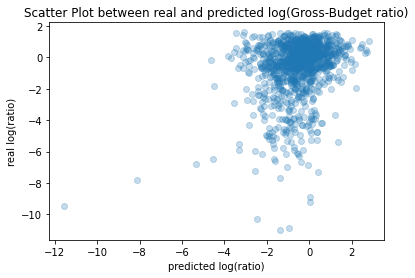

In [264]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)
plt.ylabel("real log(ratio)")
plt.xlabel("predicted log(ratio)")
plt.title("Scatter Plot between real and predicted log(Gross-Budget ratio)", size=12)
plt.show()

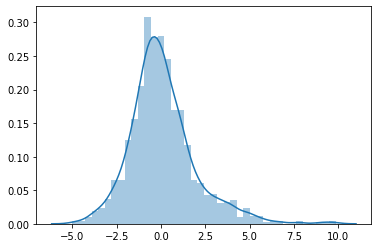

In [265]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

In [266]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(
    mean_squared_error(np.array(y_test), preds2),
    mean_absolute_error(np.array(y_test), preds2),
    explained_variance_score(np.array(y_test), preds2),
    r2_score(np.array(y_test), preds2)
)

3.5409114481932855 1.3613959186205802 -0.07011675209581525 -0.07261061191189788


#### 3.2. Probabilistic neural network predicting log profitability

In [23]:
from tensorflow_probability import layers as tfpl
from tensorflow_probability import distributions as tfd

In [24]:
X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y2, test_size=0.33, random_state=42)

In [29]:
model3 = tfk.Sequential([
    tfpl.DenseFlipout(32, activation='sigmoid', input_shape=[X_train.shape[1]]),
    tfkl.Dense(1, activation="sigmoid"),
    tfpl.DistributionLambda(make_distribution_fn=lambda t: tfd.Normal(
          loc=t, scale=1e-3 + tf.math.softplus(0.02 * t),
      ))
])

model3.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.KLDivergence(), metrics=[])
model3.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=150, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 1873 samples, validate on 469 samples
Epoch 1/500
1873/1873 [==============================] - 1s 493us/sample - loss: 2179.7439 - val_loss: 2173.3543
Epoch 2/500
1873/1873 [==============================] - 0s 36us/sample - loss: 2167.9548 - val_loss: 2161.5773
Epoch 3/500
1873/1873 [==============================] - 0s 30us/sample - loss: 2156.3861 - val_loss: 2150.2724
Epoch 4/500
1873/1873 [==============================] - 0s 47us/sample - loss: 2145.0320 - val_loss: 2138.7198
Epoch 5/500
1873/1873 [==============================] - 0s 31us/sample - loss: 2133.7306 - val_loss: 2127.3569
Epoch 6/500
1873/1873 [==============================] - 0s 28us/sample - loss: 2122.3565 - val_loss: 2116.2626
Epoch 7/500
1873/1873 [==============================] - 0s 25us/sample - loss: 2111.2606 - val_loss: 2105.0811
Epoch 8/500
1873/1873 [==============================] - 0s 25us/sample - loss: 2100.0520 - val_loss: 2094.0131
Epoch 9/500
1873/1873 [==============================] -

Epoch 146/500
1873/1873 [==============================] - 0s 29us/sample - loss: 726.6184 - val_loss: 721.8245
Epoch 147/500
1873/1873 [==============================] - 0s 37us/sample - loss: 718.3771 - val_loss: 713.8027
Epoch 148/500
1873/1873 [==============================] - 0s 27us/sample - loss: 710.0909 - val_loss: 705.5156
Epoch 149/500
1873/1873 [==============================] - 0s 36us/sample - loss: 701.9649 - val_loss: 697.3337
Epoch 150/500
1873/1873 [==============================] - 0s 31us/sample - loss: 693.8338 - val_loss: 689.1769
Epoch 151/500
1873/1873 [==============================] - 0s 27us/sample - loss: 685.7995 - val_loss: 681.2782
Epoch 152/500
1873/1873 [==============================] - 0s 24us/sample - loss: 677.7501 - val_loss: 673.1533
Epoch 153/500
1873/1873 [==============================] - 0s 28us/sample - loss: 669.7233 - val_loss: 664.9516
Epoch 154/500
1873/1873 [==============================] - 0s 24us/sample - loss: 661.6984 - val_loss: 6

Epoch 293/500
1873/1873 [==============================] - 0s 23us/sample - loss: 37.3514 - val_loss: 36.6792
Epoch 294/500
1873/1873 [==============================] - 0s 23us/sample - loss: 36.1424 - val_loss: 35.5250
Epoch 295/500
1873/1873 [==============================] - 0s 24us/sample - loss: 35.0109 - val_loss: 34.5302
Epoch 296/500
1873/1873 [==============================] - 0s 32us/sample - loss: 33.8354 - val_loss: 33.3226
Epoch 297/500
1873/1873 [==============================] - 0s 28us/sample - loss: 32.6859 - val_loss: 32.1035
Epoch 298/500
1873/1873 [==============================] - 0s 28us/sample - loss: 31.5142 - val_loss: 30.9949
Epoch 299/500
1873/1873 [==============================] - 0s 23us/sample - loss: 30.5048 - val_loss: 29.9124
Epoch 300/500
1873/1873 [==============================] - 0s 29us/sample - loss: 29.4642 - val_loss: 29.0335
Epoch 301/500
1873/1873 [==============================] - 0s 36us/sample - loss: 28.4286 - val_loss: 27.8965
Epoch 302/

Epoch 444/500
1873/1873 [==============================] - 0s 24us/sample - loss: 0.2661 - val_loss: 0.3841
Epoch 445/500
1873/1873 [==============================] - 0s 23us/sample - loss: 0.3028 - val_loss: 0.2324
Epoch 446/500
1873/1873 [==============================] - 0s 23us/sample - loss: 0.3161 - val_loss: 0.3241
Epoch 447/500
1873/1873 [==============================] - 0s 24us/sample - loss: 0.4189 - val_loss: 0.4328
Epoch 448/500
1873/1873 [==============================] - 0s 24us/sample - loss: 0.3475 - val_loss: 0.2374
Epoch 449/500
1873/1873 [==============================] - 0s 25us/sample - loss: 0.2752 - val_loss: 0.2711
Epoch 450/500
1873/1873 [==============================] - 0s 24us/sample - loss: 0.3467 - val_loss: 0.3578
Epoch 451/500
1873/1873 [==============================] - 0s 25us/sample - loss: 0.3015 - val_loss: 0.3335
Epoch 452/500
1873/1873 [==============================] - 0s 23us/sample - loss: 0.2963 - val_loss: 0.2115
Epoch 453/500
1873/1873 [===

In [30]:
preds3 = model3.predict(X_test).flatten()

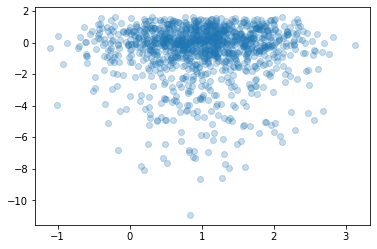

In [31]:
plt.scatter(preds3, np.array(y_test).flatten(), alpha=0.25)

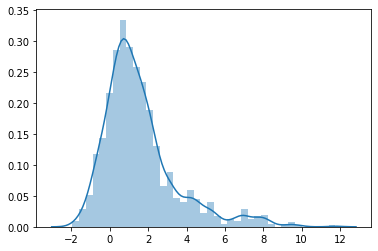

In [32]:
errors3 = preds3 - np.array(y_test).flatten()
sns.distplot(errors3)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(
    mean_squared_error(np.array(y_test), preds3),
    mean_absolute_error(np.array(y_test), preds3),
    explained_variance_score(np.array(y_test), preds3),
    r2_score(np.array(y_test), preds3)
)

6.156227625949517 1.742328767083398 -0.14680237769822213 -0.904183202006102


#### 3.3 Traditional network with a classification problem instead

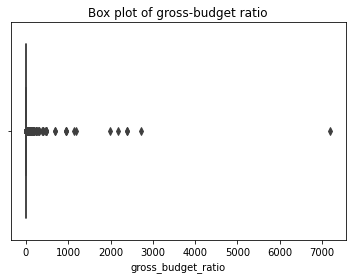

In [244]:
sns.boxplot(df_prof["gross_budget_ratio"]) # to show the ridiculous range of data
plt.title("Box plot of gross-budget ratio")
plt.show()

##### 3.3.1 2 classes

In [267]:
def classify_ratio(ratio):
    if ratio < 1:
        return 0
    else:
        return 1

In [268]:
df_cut["profitability_class"] = df_cut["gross_budget_ratio"].apply(lambda x : classify_ratio(x))
y3 = df_cut["profitability_class"].reset_index(drop=True)

#y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y3, test_size=0.4, random_state=42)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Box plot of gross-budget ratio after eliminating outliers')

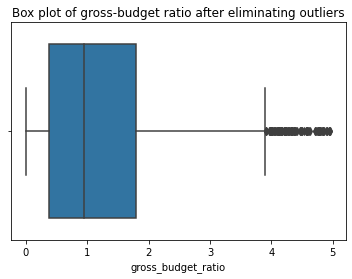

In [269]:
sns.boxplot(df_cut["gross_budget_ratio"])
plt.title("Box plot of gross-budget ratio after eliminating outliers")

In [270]:
y3[y3==1].shape, normed_X_cut[y3==1].shape

((1647,), (1647, 27))

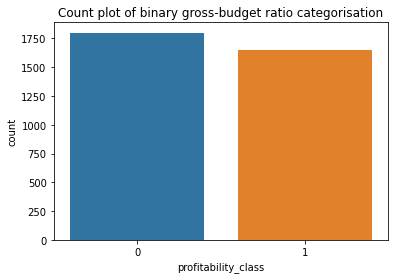

In [271]:
sns.countplot(y3)
plt.title("Count plot of binary gross-budget ratio categorisation")
plt.show()

In [272]:
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

In [277]:
num_classes = 2

model4 = tfk.Sequential([
    tfkl.Dense(32, activation="sigmoid",
              kernel_regularizer=tfk.regularizers.l2(1e-4)),
    tfkl.Dropout(0.2),
    tfkl.Dense(num_classes, activation="softmax")
])

model4.compile(optimizer=tfk.optimizers.Adam(1e-2),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy', tfk.metrics.Recall()])
model4.fit(X_train.values, y_train, validation_split=0.33, 
           epochs=500, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1384 samples, validate on 683 samples
Epoch 1/500
1384/1384 [==============================] - 1s 562us/sample - loss: 0.7477 - accuracy: 0.5123 - recall_9: 0.5123 - val_loss: 0.6886 - val_accuracy: 0.5564 - val_recall_9: 0.5564
Epoch 2/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.7044 - accuracy: 0.5527 - recall_9: 0.5527 - val_loss: 0.6841 - val_accuracy: 0.5578 - val_recall_9: 0.5578
Epoch 3/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.7003 - accuracy: 0.5636 - recall_9: 0.5636 - val_loss: 0.6717 - val_accuracy: 0.5988 - val_recall_9: 0.5988
Epoch 4/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6829 - accuracy: 0.5795 - recall_9: 0.5795 - val_loss: 0.6745 - val_accuracy: 0.6003 - val_recall_9: 0.6003
Epoch 5/500
1384/1384 [==============================] - 0s 34us/sample - loss: 0.6841 - accuracy: 0.5816 - recall_9: 0.5816 - val_loss: 0.6705 - val_accuracy: 0.5915 - val_recall_9: 0.5915
Ep

Epoch 44/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.6560 - accuracy: 0.6199 - recall_9: 0.6199 - val_loss: 0.6702 - val_accuracy: 0.6003 - val_recall_9: 0.6003
Epoch 45/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.6472 - accuracy: 0.6243 - recall_9: 0.6243 - val_loss: 0.6738 - val_accuracy: 0.5974 - val_recall_9: 0.5974
Epoch 46/500
1384/1384 [==============================] - 0s 37us/sample - loss: 0.6470 - accuracy: 0.6286 - recall_9: 0.6286 - val_loss: 0.6714 - val_accuracy: 0.6105 - val_recall_9: 0.6105
Epoch 47/500
1384/1384 [==============================] - 0s 41us/sample - loss: 0.6527 - accuracy: 0.6192 - recall_9: 0.6192 - val_loss: 0.6706 - val_accuracy: 0.6003 - val_recall_9: 0.6003
Epoch 48/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6455 - accuracy: 0.6214 - recall_9: 0.6214 - val_loss: 0.6722 - val_accuracy: 0.5988 - val_recall_9: 0.5988
Epoch 49/500
1384/1384 [=====================

Epoch 87/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6380 - accuracy: 0.6590 - recall_9: 0.6590 - val_loss: 0.6766 - val_accuracy: 0.5900 - val_recall_9: 0.5900
Epoch 88/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6345 - accuracy: 0.6416 - recall_9: 0.6416 - val_loss: 0.6774 - val_accuracy: 0.6047 - val_recall_9: 0.6047
Epoch 89/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6270 - accuracy: 0.6597 - recall_9: 0.6597 - val_loss: 0.6741 - val_accuracy: 0.6105 - val_recall_9: 0.6105
Epoch 90/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.6423 - accuracy: 0.6438 - recall_9: 0.6438 - val_loss: 0.6762 - val_accuracy: 0.6149 - val_recall_9: 0.6149
Epoch 91/500
1384/1384 [==============================] - 0s 35us/sample - loss: 0.6275 - accuracy: 0.6553 - recall_9: 0.6553 - val_loss: 0.6733 - val_accuracy: 0.6135 - val_recall_9: 0.6135
Epoch 92/500
1384/1384 [=====================

Epoch 130/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6208 - accuracy: 0.6785 - recall_9: 0.6785 - val_loss: 0.6843 - val_accuracy: 0.6105 - val_recall_9: 0.6105
Epoch 131/500
1384/1384 [==============================] - 0s 34us/sample - loss: 0.6063 - accuracy: 0.6864 - recall_9: 0.6864 - val_loss: 0.6838 - val_accuracy: 0.6164 - val_recall_9: 0.6164
Epoch 132/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.6059 - accuracy: 0.6922 - recall_9: 0.6922 - val_loss: 0.6816 - val_accuracy: 0.6281 - val_recall_9: 0.6281
Epoch 133/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.6238 - accuracy: 0.6720 - recall_9: 0.6720 - val_loss: 0.6855 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 134/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5966 - accuracy: 0.7016 - recall_9: 0.7016 - val_loss: 0.6849 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 135/500
1384/1384 [===============

Epoch 173/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.5827 - accuracy: 0.7225 - recall_9: 0.7225 - val_loss: 0.6916 - val_accuracy: 0.6061 - val_recall_9: 0.6061
Epoch 174/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.5852 - accuracy: 0.7153 - recall_9: 0.7153 - val_loss: 0.7004 - val_accuracy: 0.6120 - val_recall_9: 0.6120
Epoch 175/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.5901 - accuracy: 0.7074 - recall_9: 0.7074 - val_loss: 0.7051 - val_accuracy: 0.6164 - val_recall_9: 0.6164
Epoch 176/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5918 - accuracy: 0.7132 - recall_9: 0.7132 - val_loss: 0.7006 - val_accuracy: 0.6120 - val_recall_9: 0.6120
Epoch 177/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.6009 - accuracy: 0.6879 - recall_9: 0.6879 - val_loss: 0.7090 - val_accuracy: 0.6193 - val_recall_9: 0.6193
Epoch 178/500
1384/1384 [===============

Epoch 216/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.5823 - accuracy: 0.6965 - recall_9: 0.6965 - val_loss: 0.7226 - val_accuracy: 0.6179 - val_recall_9: 0.6179
Epoch 217/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5708 - accuracy: 0.7298 - recall_9: 0.7298 - val_loss: 0.7257 - val_accuracy: 0.6105 - val_recall_9: 0.6105
Epoch 218/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5893 - accuracy: 0.7139 - recall_9: 0.7139 - val_loss: 0.7162 - val_accuracy: 0.6061 - val_recall_9: 0.6061
Epoch 219/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.5843 - accuracy: 0.7225 - recall_9: 0.7225 - val_loss: 0.7144 - val_accuracy: 0.6149 - val_recall_9: 0.6149
Epoch 220/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5730 - accuracy: 0.7399 - recall_9: 0.7399 - val_loss: 0.7136 - val_accuracy: 0.6252 - val_recall_9: 0.6252
Epoch 221/500
1384/1384 [===============

Epoch 259/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5800 - accuracy: 0.7377 - recall_9: 0.7377 - val_loss: 0.7372 - val_accuracy: 0.6179 - val_recall_9: 0.6179
Epoch 260/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.5891 - accuracy: 0.7168 - recall_9: 0.7168 - val_loss: 0.7410 - val_accuracy: 0.6149 - val_recall_9: 0.6149
Epoch 261/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.5660 - accuracy: 0.7370 - recall_9: 0.7370 - val_loss: 0.7450 - val_accuracy: 0.6164 - val_recall_9: 0.6164
Epoch 262/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.5616 - accuracy: 0.7290 - recall_9: 0.7290 - val_loss: 0.7379 - val_accuracy: 0.6310 - val_recall_9: 0.6310
Epoch 263/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.5664 - accuracy: 0.7377 - recall_9: 0.7377 - val_loss: 0.7409 - val_accuracy: 0.6193 - val_recall_9: 0.6193
Epoch 264/500
1384/1384 [===============

Epoch 302/500
1384/1384 [==============================] - 0s 38us/sample - loss: 0.5556 - accuracy: 0.7514 - recall_9: 0.7514 - val_loss: 0.7546 - val_accuracy: 0.6252 - val_recall_9: 0.6252
Epoch 303/500
1384/1384 [==============================] - 0s 43us/sample - loss: 0.5540 - accuracy: 0.7522 - recall_9: 0.7522 - val_loss: 0.7503 - val_accuracy: 0.6120 - val_recall_9: 0.6120
Epoch 304/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.5531 - accuracy: 0.7471 - recall_9: 0.7471 - val_loss: 0.7525 - val_accuracy: 0.6149 - val_recall_9: 0.6149
Epoch 305/500
1384/1384 [==============================] - 0s 45us/sample - loss: 0.5580 - accuracy: 0.7478 - recall_9: 0.7478 - val_loss: 0.7521 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 306/500
1384/1384 [==============================] - 0s 40us/sample - loss: 0.5533 - accuracy: 0.7486 - recall_9: 0.7486 - val_loss: 0.7509 - val_accuracy: 0.6252 - val_recall_9: 0.6252
Epoch 307/500
1384/1384 [===============

Epoch 345/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.5471 - accuracy: 0.7442 - recall_9: 0.7442 - val_loss: 0.7797 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 346/500
1384/1384 [==============================] - 0s 37us/sample - loss: 0.5675 - accuracy: 0.7348 - recall_9: 0.7348 - val_loss: 0.7685 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 347/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5515 - accuracy: 0.7536 - recall_9: 0.7536 - val_loss: 0.7846 - val_accuracy: 0.6091 - val_recall_9: 0.6091
Epoch 348/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5509 - accuracy: 0.7500 - recall_9: 0.7500 - val_loss: 0.7796 - val_accuracy: 0.6252 - val_recall_9: 0.6252
Epoch 349/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.5561 - accuracy: 0.7399 - recall_9: 0.7399 - val_loss: 0.7804 - val_accuracy: 0.6281 - val_recall_9: 0.6281
Epoch 350/500
1384/1384 [===============

Epoch 388/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.5424 - accuracy: 0.7486 - recall_9: 0.7486 - val_loss: 0.7843 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 389/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.5552 - accuracy: 0.7529 - recall_9: 0.7529 - val_loss: 0.7894 - val_accuracy: 0.6193 - val_recall_9: 0.6193
Epoch 390/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.5512 - accuracy: 0.7536 - recall_9: 0.7536 - val_loss: 0.7895 - val_accuracy: 0.6193 - val_recall_9: 0.6193
Epoch 391/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5399 - accuracy: 0.7645 - recall_9: 0.7645 - val_loss: 0.7880 - val_accuracy: 0.6208 - val_recall_9: 0.6208
Epoch 392/500
1384/1384 [==============================] - 0s 43us/sample - loss: 0.5652 - accuracy: 0.7514 - recall_9: 0.7514 - val_loss: 0.7842 - val_accuracy: 0.6237 - val_recall_9: 0.6237
Epoch 393/500
1384/1384 [===============

Epoch 431/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5511 - accuracy: 0.7572 - recall_9: 0.7572 - val_loss: 0.7972 - val_accuracy: 0.6179 - val_recall_9: 0.6179
Epoch 432/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.5416 - accuracy: 0.7666 - recall_9: 0.7666 - val_loss: 0.7922 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 433/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5342 - accuracy: 0.7623 - recall_9: 0.7623 - val_loss: 0.7988 - val_accuracy: 0.6223 - val_recall_9: 0.6223
Epoch 434/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.5355 - accuracy: 0.7681 - recall_9: 0.7681 - val_loss: 0.8040 - val_accuracy: 0.6120 - val_recall_9: 0.6120
Epoch 435/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.5524 - accuracy: 0.7587 - recall_9: 0.7587 - val_loss: 0.8092 - val_accuracy: 0.6296 - val_recall_9: 0.6296
Epoch 436/500
1384/1384 [===============

Epoch 474/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.5287 - accuracy: 0.7645 - recall_9: 0.7645 - val_loss: 0.8067 - val_accuracy: 0.6105 - val_recall_9: 0.6105
Epoch 475/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5416 - accuracy: 0.7601 - recall_9: 0.7601 - val_loss: 0.8040 - val_accuracy: 0.6149 - val_recall_9: 0.6149
Epoch 476/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.5232 - accuracy: 0.7616 - recall_9: 0.7616 - val_loss: 0.8083 - val_accuracy: 0.6164 - val_recall_9: 0.6164
Epoch 477/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.5522 - accuracy: 0.7623 - recall_9: 0.7623 - val_loss: 0.8072 - val_accuracy: 0.6164 - val_recall_9: 0.6164
Epoch 478/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.5495 - accuracy: 0.7565 - recall_9: 0.7565 - val_loss: 0.8108 - val_accuracy: 0.6135 - val_recall_9: 0.6135
Epoch 479/500
1384/1384 [===============

In [278]:
model4.evaluate(np.array(X_train), y_train, verbose=2)
model4.evaluate(np.array(X_test), y_test, verbose=2, batch_size=128)

2067/2067 - 0s - loss: 0.5766 - accuracy: 0.7654 - recall_9: 0.7654
1379/1379 - 0s - loss: 0.7933 - accuracy: 0.6004 - recall_9: 0.6004


[0.7933451410563983, 0.6004351, 0.6004351]

In [279]:
preds4 = model4.predict(np.array(X_test))

In [280]:
preds4 # each row represents the probablities that this instance falls into one of the 3 classes 

array([[0.7645043 , 0.23549569],
       [0.76277727, 0.2372227 ],
       [0.42602625, 0.5739738 ],
       ...,
       [0.24826816, 0.7517319 ],
       [0.13164733, 0.86835265],
       [0.80743665, 0.19256331]], dtype=float32)

In [281]:
preds4_concrete = np.argmax(preds4, axis=1)
preds4_concrete

array([0, 0, 1, ..., 1, 1, 0])

In [282]:
from sklearn.metrics import confusion_matrix, classification_report

In [283]:
print(classification_report(preds4_concrete, np.argmax(y_test, 1)))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       753
           1       0.56      0.55      0.56       626

    accuracy                           0.60      1379
   macro avg       0.60      0.60      0.60      1379
weighted avg       0.60      0.60      0.60      1379



##### 3.3.2 3 classes

In [302]:
def classify_ratio_3c(ratio):
    if ratio < 1:
        return 0
    elif (ratio > 1) and (ratio < 2):
        return 1
    else:
        return 2

In [314]:
df_cut["profitability_class"] = df_cut["gross_budget_ratio"].apply(lambda x : classify_ratio_3c(x))
y3 = df_cut["profitability_class"].reset_index(drop=True)

#y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y3, test_size=0.4, random_state=42)
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


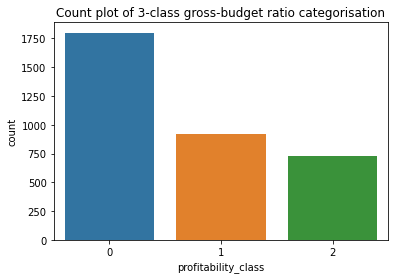

In [307]:
sns.countplot(y3)
plt.title("Count plot of 3-class gross-budget ratio categorisation")
plt.show()

In [308]:
class_0_features = X_train[y_train == 0]
class_0_labels = y_train[y_train == 0]

class_1_features = X_train[y_train == 1].values
class_2_features = X_train[y_train == 2].values
class_1_labels = y_train[y_train == 1].values
class_2_labels = y_train[y_train == 2].values


ids = np.arange(len(class_1_features))
choices = np.random.choice(ids, class_0_features.shape[0])

res_class_1_features = class_1_features[choices]
res_class_1_labels = class_1_labels[choices]

ids = np.arange(len(class_2_features))
choices = np.random.choice(ids, class_0_features.shape[0])

res_class_2_features = class_2_features[choices]
res_class_2_labels = class_2_labels[choices]

resampled_X = np.concatenate([class_0_features.values, res_class_1_features, res_class_2_features])
resampled_y = np.concatenate([class_0_labels, res_class_1_labels, res_class_2_labels])

order = np.arange(len(resampled_y))
np.random.shuffle(order)
resampled_X = resampled_X[order]
resampled_y = resampled_y[order]
resampled_y_encoded = tfk.utils.to_categorical(resampled_y)

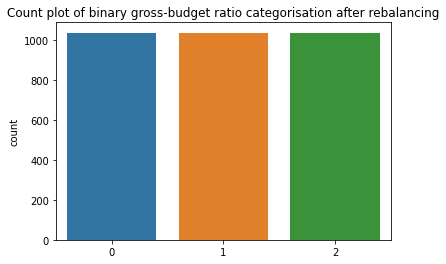

In [309]:
sns.countplot(resampled_y)
plt.title("Count plot of binary gross-budget ratio categorisation after rebalancing")
plt.show()

In [310]:
# class_0, class_1 = np.bincount(df_cut["profitability_class"])
# total = class_0 + class_1 

# weight_for_0 = (1 / class_0)*(total)/2.0 
# weight_for_1 = (1 / class_1)*(total)/2.0
# # weight_for_2 = (1 / class_2)*(total)/3.0

# class_weight = {0: weight_for_0, 1: weight_for_1}

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [321]:
num_classes = 3
model5 = tfk.Sequential([
#     tfkl.Dense(128, activation="sigmoid"),
#     tfkl.Dense(64, activation="sigmoid", input_shape=[X_train.shape[1]],
#                kernel_regularizer=tfk.regularizers.l2(1e-4)),
#     tfkl.Dropout(0.3),
    tfkl.Dense(32, activation="sigmoid",
              kernel_regularizer=tfk.regularizers.l2(1e-4)
              ),
    tfkl.Dropout(0.3),
    tfkl.Dense(num_classes, activation="softmax")
])

model5.compile(optimizer=tfk.optimizers.Adam(1e-3),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy', tfk.metrics.Recall()])
model5.fit(np.array(resampled_X), resampled_y_encoded, validation_split=0.33, 
           epochs=500, batch_size=128, use_multiprocessing=True, workers=10)

Train on 2084 samples, validate on 1027 samples
Epoch 1/500
2084/2084 [==============================] - 1s 363us/sample - loss: 1.1745 - accuracy: 0.3503 - recall_18: 0.1132 - val_loss: 1.1093 - val_accuracy: 0.3642 - val_recall_18: 0.0049
Epoch 2/500
2084/2084 [==============================] - 0s 31us/sample - loss: 1.1627 - accuracy: 0.3450 - recall_18: 0.0988 - val_loss: 1.0968 - val_accuracy: 0.3729 - val_recall_18: 0.0068
Epoch 3/500
2084/2084 [==============================] - 0s 28us/sample - loss: 1.1372 - accuracy: 0.3618 - recall_18: 0.0998 - val_loss: 1.0922 - val_accuracy: 0.3768 - val_recall_18: 0.0078
Epoch 4/500
2084/2084 [==============================] - 0s 35us/sample - loss: 1.1310 - accuracy: 0.3642 - recall_18: 0.1147 - val_loss: 1.0908 - val_accuracy: 0.3846 - val_recall_18: 0.0146
Epoch 5/500
2084/2084 [==============================] - 0s 32us/sample - loss: 1.1216 - accuracy: 0.3695 - recall_18: 0.1180 - val_loss: 1.0868 - val_accuracy: 0.3856 - val_recall_18

2084/2084 [==============================] - 0s 24us/sample - loss: 1.0435 - accuracy: 0.4631 - recall_18: 0.1440 - val_loss: 1.0600 - val_accuracy: 0.4489 - val_recall_18: 0.1120
Epoch 86/500
2084/2084 [==============================] - 0s 26us/sample - loss: 1.0437 - accuracy: 0.4650 - recall_18: 0.1454 - val_loss: 1.0599 - val_accuracy: 0.4518 - val_recall_18: 0.1139
Epoch 87/500
2084/2084 [==============================] - 0s 22us/sample - loss: 1.0482 - accuracy: 0.4568 - recall_18: 0.1536 - val_loss: 1.0591 - val_accuracy: 0.4479 - val_recall_18: 0.1139
Epoch 88/500
2084/2084 [==============================] - 0s 24us/sample - loss: 1.0435 - accuracy: 0.4731 - recall_18: 0.1516 - val_loss: 1.0596 - val_accuracy: 0.4518 - val_recall_18: 0.1130
Epoch 89/500
2084/2084 [==============================] - 0s 27us/sample - loss: 1.0435 - accuracy: 0.4717 - recall_18: 0.1492 - val_loss: 1.0605 - val_accuracy: 0.4508 - val_recall_18: 0.1110
Epoch 90/500
2084/2084 [========================

2084/2084 [==============================] - 0s 23us/sample - loss: 1.0362 - accuracy: 0.4717 - recall_18: 0.1804 - val_loss: 1.0563 - val_accuracy: 0.4537 - val_recall_18: 0.1383
Epoch 170/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0357 - accuracy: 0.4851 - recall_18: 0.1852 - val_loss: 1.0568 - val_accuracy: 0.4567 - val_recall_18: 0.1451
Epoch 171/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0339 - accuracy: 0.4861 - recall_18: 0.1881 - val_loss: 1.0553 - val_accuracy: 0.4606 - val_recall_18: 0.1383
Epoch 172/500
2084/2084 [==============================] - 0s 30us/sample - loss: 1.0260 - accuracy: 0.5024 - recall_18: 0.1886 - val_loss: 1.0571 - val_accuracy: 0.4576 - val_recall_18: 0.1490
Epoch 173/500
2084/2084 [==============================] - 0s 24us/sample - loss: 1.0333 - accuracy: 0.4731 - recall_18: 0.1948 - val_loss: 1.0569 - val_accuracy: 0.4576 - val_recall_18: 0.1509
Epoch 174/500
2084/2084 [===================

2084/2084 [==============================] - 0s 23us/sample - loss: 1.0160 - accuracy: 0.4933 - recall_18: 0.2274 - val_loss: 1.0504 - val_accuracy: 0.4567 - val_recall_18: 0.1685
Epoch 254/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0275 - accuracy: 0.4885 - recall_18: 0.2279 - val_loss: 1.0506 - val_accuracy: 0.4615 - val_recall_18: 0.1743
Epoch 255/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0246 - accuracy: 0.4856 - recall_18: 0.2294 - val_loss: 1.0495 - val_accuracy: 0.4732 - val_recall_18: 0.1704
Epoch 256/500
2084/2084 [==============================] - 0s 22us/sample - loss: 1.0206 - accuracy: 0.5000 - recall_18: 0.2145 - val_loss: 1.0481 - val_accuracy: 0.4732 - val_recall_18: 0.1655
Epoch 257/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0238 - accuracy: 0.4947 - recall_18: 0.2212 - val_loss: 1.0489 - val_accuracy: 0.4713 - val_recall_18: 0.1665
Epoch 258/500
2084/2084 [===================

2084/2084 [==============================] - 0s 22us/sample - loss: 1.0096 - accuracy: 0.5034 - recall_18: 0.2481 - val_loss: 1.0423 - val_accuracy: 0.4907 - val_recall_18: 0.1889
Epoch 338/500
2084/2084 [==============================] - 0s 22us/sample - loss: 1.0165 - accuracy: 0.5024 - recall_18: 0.2279 - val_loss: 1.0411 - val_accuracy: 0.4878 - val_recall_18: 0.1889
Epoch 339/500
2084/2084 [==============================] - 0s 22us/sample - loss: 1.0163 - accuracy: 0.5158 - recall_18: 0.2380 - val_loss: 1.0411 - val_accuracy: 0.4907 - val_recall_18: 0.1831
Epoch 340/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0152 - accuracy: 0.5106 - recall_18: 0.2433 - val_loss: 1.0399 - val_accuracy: 0.4898 - val_recall_18: 0.1792
Epoch 341/500
2084/2084 [==============================] - 0s 23us/sample - loss: 1.0148 - accuracy: 0.5149 - recall_18: 0.2486 - val_loss: 1.0403 - val_accuracy: 0.4888 - val_recall_18: 0.1792
Epoch 342/500
2084/2084 [===================

2084/2084 [==============================] - 0s 26us/sample - loss: 1.0062 - accuracy: 0.5082 - recall_18: 0.2730 - val_loss: 1.0317 - val_accuracy: 0.5054 - val_recall_18: 0.2016
Epoch 422/500
2084/2084 [==============================] - 0s 24us/sample - loss: 0.9961 - accuracy: 0.5211 - recall_18: 0.2793 - val_loss: 1.0315 - val_accuracy: 0.4976 - val_recall_18: 0.2035
Epoch 423/500
2084/2084 [==============================] - 0s 23us/sample - loss: 0.9984 - accuracy: 0.5221 - recall_18: 0.2821 - val_loss: 1.0313 - val_accuracy: 0.4946 - val_recall_18: 0.2045
Epoch 424/500
2084/2084 [==============================] - 0s 24us/sample - loss: 1.0031 - accuracy: 0.5206 - recall_18: 0.2793 - val_loss: 1.0313 - val_accuracy: 0.4995 - val_recall_18: 0.2074
Epoch 425/500
2084/2084 [==============================] - 0s 22us/sample - loss: 1.0040 - accuracy: 0.5062 - recall_18: 0.2754 - val_loss: 1.0313 - val_accuracy: 0.5015 - val_recall_18: 0.2055
Epoch 426/500
2084/2084 [===================

In [322]:
model5.evaluate(np.array(X_train), y_train, verbose=2)
model5.evaluate(np.array(X_test), y_test, verbose=2, batch_size=128)

2067/2067 - 0s - loss: 1.0006 - accuracy: 0.5365 - recall_18: 0.2598
1379/1379 - 0s - loss: 1.0288 - accuracy: 0.4989 - recall_18: 0.2393


[1.0288227037557058, 0.49891225, 0.23930384]

In [323]:
preds5 = model5.predict(np.array(X_test))
preds5_concrete = np.argmax(preds5, axis=1)
print(classification_report(preds5_concrete, np.argmax(y_test, 1)))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62       672
           1       0.35      0.33      0.34       353
           2       0.43      0.35      0.39       354

    accuracy                           0.50      1379
   macro avg       0.46      0.45      0.45      1379
weighted avg       0.49      0.50      0.49      1379



In [351]:
num_classes = 3
model6 = tfk.Sequential([
#     tfkl.Dense(64, activation="relu"),
#     tfkl.Dropout(0.3),
    tfkl.Dense(32, activation="sigmoid",
#               kernel_regularizer=tfk.regularizers.l2(1e-6)
              ),
#     tfkl.Dropout(0.3),
    tfkl.Dense(num_classes, activation="softmax")
])

model6.compile(optimizer=tfk.optimizers.Adam(1e-3),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy', tfk.metrics.Recall()])
model6.fit(np.array(X_train), y_train, validation_split=0.33, 
           epochs=500, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1384 samples, validate on 683 samples
Epoch 1/500
1384/1384 [==============================] - 1s 468us/sample - loss: 1.0848 - accuracy: 0.4783 - recall_31: 0.2254 - val_loss: 1.0547 - val_accuracy: 0.5037 - val_recall_31: 0.2518
Epoch 2/500
1384/1384 [==============================] - 0s 26us/sample - loss: 1.0531 - accuracy: 0.4957 - recall_31: 0.2572 - val_loss: 1.0463 - val_accuracy: 0.5124 - val_recall_31: 0.2914
Epoch 3/500
1384/1384 [==============================] - 0s 33us/sample - loss: 1.0378 - accuracy: 0.5051 - recall_31: 0.2832 - val_loss: 1.0437 - val_accuracy: 0.5168 - val_recall_31: 0.2914
Epoch 4/500
1384/1384 [==============================] - 0s 28us/sample - loss: 1.0300 - accuracy: 0.5043 - recall_31: 0.2594 - val_loss: 1.0413 - val_accuracy: 0.5139 - val_recall_31: 0.2972
Epoch 5/500
1384/1384 [==============================] - 0s 29us/sample - loss: 1.0234 - accuracy: 0.5051 - recall_31: 0.3114 - val_loss: 1.0373 - val_accuracy: 0.5139 - val_recall_31:

1384/1384 [==============================] - 0s 27us/sample - loss: 0.9551 - accuracy: 0.5340 - recall_31: 0.3642 - val_loss: 1.0176 - val_accuracy: 0.5037 - val_recall_31: 0.3499
Epoch 86/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.9548 - accuracy: 0.5383 - recall_31: 0.3620 - val_loss: 1.0176 - val_accuracy: 0.5066 - val_recall_31: 0.3411
Epoch 87/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.9547 - accuracy: 0.5412 - recall_31: 0.3540 - val_loss: 1.0175 - val_accuracy: 0.5022 - val_recall_31: 0.3324
Epoch 88/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.9546 - accuracy: 0.5390 - recall_31: 0.3627 - val_loss: 1.0177 - val_accuracy: 0.5066 - val_recall_31: 0.3514
Epoch 89/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.9541 - accuracy: 0.5412 - recall_31: 0.3627 - val_loss: 1.0181 - val_accuracy: 0.5066 - val_recall_31: 0.3470
Epoch 90/500
1384/1384 [========================

1384/1384 [==============================] - 0s 25us/sample - loss: 0.9280 - accuracy: 0.5571 - recall_31: 0.3808 - val_loss: 1.0140 - val_accuracy: 0.5198 - val_recall_31: 0.3470
Epoch 170/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.9290 - accuracy: 0.5636 - recall_31: 0.3714 - val_loss: 1.0133 - val_accuracy: 0.5037 - val_recall_31: 0.3280
Epoch 171/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.9270 - accuracy: 0.5672 - recall_31: 0.3699 - val_loss: 1.0143 - val_accuracy: 0.5168 - val_recall_31: 0.3382
Epoch 172/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.9270 - accuracy: 0.5614 - recall_31: 0.3779 - val_loss: 1.0148 - val_accuracy: 0.5183 - val_recall_31: 0.3470
Epoch 173/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.9264 - accuracy: 0.5629 - recall_31: 0.3815 - val_loss: 1.0147 - val_accuracy: 0.5110 - val_recall_31: 0.3397
Epoch 174/500
1384/1384 [===================

1384/1384 [==============================] - 0s 32us/sample - loss: 0.8923 - accuracy: 0.5939 - recall_31: 0.4061 - val_loss: 1.0160 - val_accuracy: 0.5154 - val_recall_31: 0.3602
Epoch 254/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.8915 - accuracy: 0.5947 - recall_31: 0.4025 - val_loss: 1.0157 - val_accuracy: 0.5095 - val_recall_31: 0.3470
Epoch 255/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8910 - accuracy: 0.5961 - recall_31: 0.4032 - val_loss: 1.0157 - val_accuracy: 0.5095 - val_recall_31: 0.3514
Epoch 256/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8907 - accuracy: 0.5947 - recall_31: 0.4053 - val_loss: 1.0166 - val_accuracy: 0.5081 - val_recall_31: 0.3543
Epoch 257/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.8902 - accuracy: 0.5939 - recall_31: 0.4017 - val_loss: 1.0150 - val_accuracy: 0.5124 - val_recall_31: 0.3514
Epoch 258/500
1384/1384 [===================

1384/1384 [==============================] - 0s 28us/sample - loss: 0.8482 - accuracy: 0.6228 - recall_31: 0.4538 - val_loss: 1.0255 - val_accuracy: 0.5051 - val_recall_31: 0.3660
Epoch 338/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8476 - accuracy: 0.6228 - recall_31: 0.4624 - val_loss: 1.0276 - val_accuracy: 0.5051 - val_recall_31: 0.3734
Epoch 339/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8466 - accuracy: 0.6228 - recall_31: 0.4632 - val_loss: 1.0259 - val_accuracy: 0.5037 - val_recall_31: 0.3675
Epoch 340/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.8466 - accuracy: 0.6250 - recall_31: 0.4588 - val_loss: 1.0248 - val_accuracy: 0.5007 - val_recall_31: 0.3675
Epoch 341/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8452 - accuracy: 0.6221 - recall_31: 0.4566 - val_loss: 1.0266 - val_accuracy: 0.5007 - val_recall_31: 0.3631
Epoch 342/500
1384/1384 [===================

1384/1384 [==============================] - 0s 32us/sample - loss: 0.7976 - accuracy: 0.6474 - recall_31: 0.5065 - val_loss: 1.0444 - val_accuracy: 0.5037 - val_recall_31: 0.3836
Epoch 422/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.7968 - accuracy: 0.6496 - recall_31: 0.5101 - val_loss: 1.0437 - val_accuracy: 0.5007 - val_recall_31: 0.3792
Epoch 423/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.7963 - accuracy: 0.6503 - recall_31: 0.5051 - val_loss: 1.0448 - val_accuracy: 0.5007 - val_recall_31: 0.3777
Epoch 424/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.7959 - accuracy: 0.6517 - recall_31: 0.5043 - val_loss: 1.0444 - val_accuracy: 0.5007 - val_recall_31: 0.3777
Epoch 425/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.7949 - accuracy: 0.6503 - recall_31: 0.5065 - val_loss: 1.0442 - val_accuracy: 0.5037 - val_recall_31: 0.3807
Epoch 426/500
1384/1384 [===================

In [352]:
model6.evaluate(np.array(X_train), y_train, verbose=2)
model6.evaluate(np.array(X_test), y_test, verbose=2, batch_size=128)

2067/2067 - 0s - loss: 0.8537 - accuracy: 0.6193 - recall_31: 0.5056
1379/1379 - 0s - loss: 0.9956 - accuracy: 0.5228 - recall_31: 0.4054


[0.9956351650029183, 0.52284265, 0.4053662]

In [353]:
preds6 = model6.predict(np.array(X_test))
preds6_concrete = np.argmax(preds6, axis=1)
print(classification_report(preds6_concrete, np.argmax(y_test, 1)))

              precision    recall  f1-score   support

           0       0.76      0.61      0.67       960
           1       0.24      0.29      0.26       273
           2       0.22      0.42      0.29       146

    accuracy                           0.52      1379
   macro avg       0.40      0.44      0.41      1379
weighted avg       0.60      0.52      0.55      1379

